<img src='../img/acam_banner.png' alt='ACAM Training School' align='right' width='60%'></img>

<br>

<hr>

# GEOS Composition Forecasts (GEOS-CF)

### About

This notebook provides an introduction to data from the [GEOS Composition Foresasting (CF) system](https://gmao.gsfc.nasa.gov/weather_prediction/GEOS-CF/) and shows you how to visualize and animate atmospheric composition variables.

The GEOS Composition Forecasting (GEOS-CF) system produces global, three-dimensional distributions of atmospheric composition. The spatial resolution is 25km. Using meteorological analyses from other GEOS systems, the GEOS-CF products include a running atmospheric replay to provide near-time estimates of surface pollutant distributions and the composition of the troposphere and stratosphere. A single five-day forecast is generated daily, beginning at 12Z.

GEOS-CF is intended for use by NASA researchers and the broader community, in order to study the interactions among global atmospheric transport, surface emissions, chemical processes, and wet and dry deposition in maintaining the balance of atmospheric composition.

The notebook examines specifically the atmospheric gas **Ozone** for the Hindu Kush-Himalayan (HKH) region from 23 to 26 May 2023.


### Basic Facts

> **Spatial resolution**: `25 km x 25 km` <br>
> **Spatial coverage**: `Global` <br>
> **Temporal resolution**:  `3-hourly up to five days in advance` <br>
> **Temporal coverage**: `since 1 January 2018` <br>
> **Data format**: `netCDF`


### How to access the data

GEOS-CF data can be accessed in different ways, e.g data can be downloaded from the [NASA Center For Climate Simulation (NCCS) portal](https://portal.nccs.nasa.gov/datashare/gmao/geos-cf/). See [here](https://gmao.gsfc.nasa.gov/weather_prediction/GEOS-CF/data_access/) the full list of potential data access systems.


### Module outline
* [1 - Load and browse GEOS-CF data](#load_geos)
* [2 - Create a geographical subset for the Hindu Kush-Himalayan region](#hkh_subset)
* [3 - Visualize and animate the Ozone mixing ratio forecast for the HKH region](#visualize_animate)
* [4 - Create a time-series of Ozone over Kathamandu](#ts_kathmandu)

<hr>

#### Load required libraries

In [1]:
import glob
import os
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import Image, display, HTML

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='load_geos'></a>Load and browse GEOS-CF data

A subset of the GEOS-CF forecast from 23 May 2023 was downloaded from the NASA Center For Climate Simulation (NCCS) portal and is available under `../../eodata/acam_training_school/GEOS-CF/`. GEOS-CF data is disseminated in `netCDF`. Let us first open one data file to see how the data is structured. You can used the xarray function `open_dataset()` to load one single netCDF file.

Once loaded, you see that the data have four dimensions (lon,lat, lev and time) and five variables (CO, NO2, O3, PM2.5 and SO2).

In [3]:
file1 = xr.open_dataset('../../eodata/acam_training_school/GEOS_CF/GEOS-CF.v01.fcst.aqc_tavg_1hr_g1440x721_v1.20230523_12z+20230523_1230z.nc4')
file1

<xarray.Dataset>
Dimensions:        (lon: 1440, lat: 721, lev: 1, time: 1)
Coordinates:
  * lon            (lon) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * lat            (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lev            (lev) float64 72.0
  * time           (time) datetime64[ns] 2023-05-23T12:30:00
Data variables:
    CO             (time, lev, lat, lon) float32 ...
    NO2            (time, lev, lat, lon) float32 ...
    O3             (time, lev, lat, lon) float32 ...
    PM25_RH35_GCC  (time, lev, lat, lon) float32 ...
    SO2            (time, lev, lat, lon) float32 ...
Attributes: (12/28)
    Contact:               http://gmao.gsfc.nasa.gov
    History:               Original file generated: Tue May 23 23:12:30 2023 GMT
    Comment:               GMAO filename: GEOS-CF.aqc_tavg_1hr_g1440x721_v1.2...
    Filename:              GEOS-CF.v01.fcst.aqc_tavg_1hr_g1440x721_v1.2023052...
    Source:                cak_Icarus-1_0_GCCv12-00-01_v2_004_SLES12_impi exp...
    Conventions:           CF-1
    ...                    ...
    NorthernmostLatitude:  90.0
    WesternmostLongitude:  -180.0
    EasternmostLongitude:  179.75
    LatitudeResolution:    0.25
    LongitudeResolution:   0.25
    DataResolution:        0.25 x 0.25

The regular structure of the data allows us to load all data files into one `xarray.Dataset`. You can use the xarray function `open_mfdataset()` to load multiple netCDF file at once. You want to select `time` as the dimension by which the files shall be concatenated. The result is that the time dimension has 28 entries, for each data file one.

In [4]:
files = xr.open_mfdataset('../../eodata/acam_training_school/GEOS_CF/*', concat_dim='time', combine='nested')
files

<xarray.Dataset>
Dimensions:        (lon: 1440, lat: 721, lev: 1, time: 28)
Coordinates:
  * lon            (lon) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * lat            (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lev            (lev) float64 72.0
  * time           (time) datetime64[ns] 2023-05-23T12:30:00 ... 2023-05-26T2...
Data variables:
    CO             (time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    NO2            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    O3             (time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    PM25_RH35_GCC  (time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    SO2            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
Attributes: (12/28)
    Contact:               http://gmao.gsfc.nasa.gov
    History:               Original file generated: Tue May 23 23:12:30 2023 GMT
    Comment:               GMAO filename: GEOS-CF.aqc_tavg_1hr_g1440x721_v1.2...
    Filename:              GEOS-CF.v01.fcst.aqc_tavg_1hr_g1440x721_v1.2023052...
    Source:                cak_Icarus-1_0_GCCv12-00-01_v2_004_SLES12_impi exp...
    Conventions:           CF-1
    ...                    ...
    NorthernmostLatitude:  90.0
    WesternmostLongitude:  -180.0
    EasternmostLongitude:  179.75
    LatitudeResolution:    0.25
    LongitudeResolution:   0.25
    DataResolution:        0.25 x 0.25

In a next step, you can select one data variable from the Dataset and load its underlying data array. You can specify the name of the data variable (e.g. `O3`) and put it in square brackets. The result is a four dimensional `xarray.DataArray`. Additionally, the data array also provides you attributes that describe the loaded variable more in details, such as `long_name` or `units`.

In [5]:
variable = 'O3'
o3 = files[variable]
o3

<xarray.DataArray 'O3' (time: 28, lev: 1, lat: 721, lon: 1440)>
dask.array<concatenate, shape=(28, 1, 721, 1440), dtype=float32, chunksize=(1, 1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lev      (lev) float64 72.0
  * time     (time) datetime64[ns] 2023-05-23T12:30:00 ... 2023-05-26T21:30:00
Attributes:
    long_name:       Ozone (O3, MW = 48.00 g mol-1) volume mixing ratio dry air
    units:           mol mol-1
    fmissing_value:  1000000000000000.0
    standard_name:   Ozone (O3, MW = 48.00 g mol-1) volume mixing ratio dry air
    vmin:            -1000000000000000.0
    vmax:            1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

## <a id='hkh_subset'></a>Create a geographical subset for the Hindu Kush-Himalayan region

Above, you see that the data has a global coverage. Let us in a next step create a subset for the Hindu Kush-Himalayan (HKH) region (Latitude: 5 - 40 deg, Longitude: 60 - 100 deg). Let us create variables for the latitude and longitude minimum and maximum bounds.


In [6]:
latmin = 5.
latmax = 40.
lonmin = 60.
lonmax = 100.

You can use the pre-defined function [generate_geographcial_subset()](../functions.ipynb#generate_geogaphical_subset) to create a subset. Since the function works with 'latitude' and 'longitude' names instead of 'lat' and 'lon', you first have to rename both with the xarray function `rename()`.

In [7]:
o3_renamed = o3.rename({'lon': 'longitude', 'lat': 'latitude'})
o3_renamed

<xarray.DataArray 'O3' (time: 28, lev: 1, latitude: 721, longitude: 1440)>
dask.array<concatenate, shape=(28, 1, 721, 1440), dtype=float32, chunksize=(1, 1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lev        (lev) float64 72.0
  * time       (time) datetime64[ns] 2023-05-23T12:30:00 ... 2023-05-26T21:30:00
Attributes:
    long_name:       Ozone (O3, MW = 48.00 g mol-1) volume mixing ratio dry air
    units:           mol mol-1
    fmissing_value:  1000000000000000.0
    standard_name:   Ozone (O3, MW = 48.00 g mol-1) volume mixing ratio dry air
    vmin:            -1000000000000000.0
    vmax:            1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

Now, you can apply the `generate_geographical_subset()` function. The result is that the latitude and longitude dimension were reduced to 139 and 159 entries respectively.

In [8]:
o3_subset = generate_geographical_subset(o3_renamed, latmin=latmin, latmax=latmax, lonmin=lonmin, lonmax=lonmax)
o3_subset

<xarray.DataArray 'O3' (time: 28, lev: 1, latitude: 139, longitude: 159)>
dask.array<where, shape=(28, 1, 139, 159), dtype=float32, chunksize=(1, 1, 139, 159), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75
  * latitude   (latitude) float64 5.25 5.5 5.75 6.0 ... 39.0 39.25 39.5 39.75
  * lev        (lev) float64 72.0
  * time       (time) datetime64[ns] 2023-05-23T12:30:00 ... 2023-05-26T21:30:00
Attributes:
    long_name:       Ozone (O3, MW = 48.00 g mol-1) volume mixing ratio dry air
    units:           mol mol-1
    fmissing_value:  1000000000000000.0
    standard_name:   Ozone (O3, MW = 48.00 g mol-1) volume mixing ratio dry air
    vmin:            -1000000000000000.0
    vmax:            1000000000000000.0
    valid_range:     [-1.e+15  1.e+15]

Above, you see that Ozone values are given in the unit `mol mol-1`. A more common unit however is `parts per billion (ppb)`. Hence, in a next step, you can convert the Ozone values in mol mol-1 to ppb by multiplying them with 1 billion (10**9).

In [9]:
o3_subset_conv = o3_subset*10**9
o3_subset_conv

<xarray.DataArray 'O3' (time: 28, lev: 1, latitude: 139, longitude: 159)>
dask.array<mul, shape=(28, 1, 139, 159), dtype=float64, chunksize=(1, 1, 139, 159), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 60.25 60.5 60.75 61.0 ... 99.25 99.5 99.75
  * latitude   (latitude) float64 5.25 5.5 5.75 6.0 ... 39.0 39.25 39.5 39.75
  * lev        (lev) float64 72.0
  * time       (time) datetime64[ns] 2023-05-23T12:30:00 ... 2023-05-26T21:30:00

## <a id='visualize_animate'></a>Visualize and animate the Ozone mixing ratio forecast for the HKH region

Now, you can visualize one time step of Ozone mixing ratio in ppb. You can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) to create a two-dimensional plot of one time step.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Ozone mixing ratio (ppb) - 2023-05-23T15:30:00'}>)

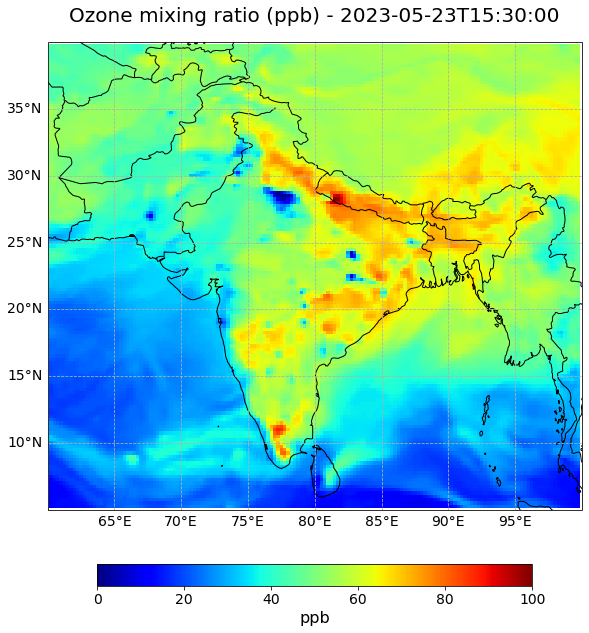

In [10]:
index=1
visualize_pcolormesh(data_array=o3_subset_conv[index,0,:,:],
                    latitude=o3_subset_conv.latitude,
                    longitude=o3_subset_conv.longitude,
                    projection=ccrs.PlateCarree(),
                    color_scale='jet',
                    unit='ppb',
                    long_name='Ozone mixing ratio (ppb) - ' + str(o3_subset_conv.time.values[index])[0:19],
                    vmin=0,
                     vmax=100,
                     set_global=False,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax
                    )

As a next step, you can animate the `Ozone mixing ratio` in order to see how the trace gas is forecasted over the next three days (beginning from 23 May 2023).

You can do animations with matplotlib's function `animation`. Jupyter's function `HTML` can then be used to display HTML and video content.

The animation function consists of 4 parts:
- **Setting the initial state:**<br>
 Here, you define the general plot your animation shall use to initialise the animation. You can also define the number of frames (time steps) your animation shall have.
 
 
- **Functions to animate:**<br>
 An animation consists of three functions: `draw()`, `init()` and `animate()`. `draw()` is the function where individual frames are passed on and the figure is returned as image. In this example, the function redraws the plot for each time step. `init()` returns the figure you defined for the initial state. `animate()` returns the `draw()` function and animates the function over the given number of frames (time steps).
 
 
- **Create a `animate.FuncAnimation` object:** <br>
 The functions defined before are now combined to build an `animate.FuncAnimation` object.
 
 
- **Play the animation as video:**<br>
 As a final step, you can integrate the animation into the notebook with the `HTML` class. You take the generate animation object and convert it to a HTML5 video with the `to_html5_video` function.

In [11]:
# Setting the initial state:
# 1. Define figure for initial plot
fig, ax = visualize_pcolormesh(data_array=o3_subset_conv[0,0,:,:],
                               longitude=o3_subset_conv.longitude, 
                               latitude=o3_subset_conv.latitude,
                               projection=ccrs.PlateCarree(), 
                               color_scale='jet', 
                               unit='-',
                               long_name='ozone mixing ratio (ppb) '+ str(o3_subset_conv.time[0].data)[0:19],
                               vmin=0,
                               vmax=100, 
                               lonmin=lonmin, 
                               lonmax=lonmax, 
                               latmin=latmin, 
                               latmax=latmax,
                               set_global=False)

frames = 27

def draw(i):
    img = plt.pcolormesh(o3_subset_conv.longitude, 
                         o3_subset_conv.latitude, 
                         o3_subset_conv[i,0,:,:], 
                         cmap='jet', 
                         transform=ccrs.PlateCarree(),
                         vmin=0,
                         vmax=100,
                         shading='auto')
    
    ax.set_title('Ozone mixing ratio (ppb) '+ str(o3_subset_conv.time[i].data)[0:19], fontsize=20, pad=20.0)
    return img

def init():
    return fig

def animate(i):
    return draw(i)

ani = animation.FuncAnimation(fig, animate, frames, interval=800, blit=False,
                              init_func=init, repeat=True)

HTML(ani.to_html5_video())
plt.close(fig)

#### Play the animation video as HTML5 video

In [12]:
HTML(ani.to_html5_video())

## <a id='ts_kathmandu'></a>Create a time-series of Ozone over Kathamandu

In a final step, let us create a time-series of Ozone over Kathmandu. For this, you first have to define the latitude and longitude coordinates for Kathmandu, who are 27.7 deg and 85.3 respectively.

In [13]:
location_lat = 27.7172
location_lon = 85.3240

In a next step, you can use the xarray function `sel()` to select values based on an array's dimensions. For point locations, it can be that an array does not hold values for the given coordinates. By adding the kwarg `method='nearest'`, the closest coordinate within in the array will be selected. After the selection, the result is a one-dimensional array with 28 entries. the longitude and latitude values selected are 85.25 deg and 27.75 deg respectively.

In [14]:
o3_loc = o3_subset_conv[:,0,:,:].sel(latitude=location_lat, 
                                     longitude=location_lon, 
                                     method='nearest')
o3_loc

<xarray.DataArray 'O3' (time: 28)>
dask.array<getitem, shape=(28,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    longitude  float64 85.25
    latitude   float64 27.75
    lev        float64 72.0
  * time       (time) datetime64[ns] 2023-05-23T12:30:00 ... 2023-05-26T21:30:00

The one-dimensional array can now be tranformed into a `pandas.DataFrame` with the function `to_dataframe()`. A pandas.DataFrame allows for a flexible handling and plotting of time-series information. Once transformed, the data frame holds the time information as index column and three columns with longitude, latitude, lev and O3.

In [15]:
o3_df = o3_loc.to_dataframe()
o3_df

longitude  latitude   lev         O3
time                                                     
2023-05-23 12:30:00      85.25     27.75  72.0  74.040145
2023-05-23 15:30:00      85.25     27.75  72.0  70.431270
2023-05-23 18:30:00      85.25     27.75  72.0  66.240318
2023-05-23 21:30:00      85.25     27.75  72.0  63.912012
2023-05-24 00:30:00      85.25     27.75  72.0  63.097104
2023-05-24 03:30:00      85.25     27.75  72.0  78.580342
2023-05-24 06:30:00      85.25     27.75  72.0  76.019724
2023-05-24 09:30:00      85.25     27.75  72.0  72.760550
2023-05-24 12:30:00      85.25     27.75  72.0  70.896959
2023-05-24 15:30:00      85.25     27.75  72.0  69.267116
2023-05-24 18:30:00      85.25     27.75  72.0  68.568625
2023-05-24 21:30:00      85.25     27.75  72.0  68.102963
2023-05-25 00:30:00      85.25     27.75  72.0  64.726919
2023-05-25 03:30:00      85.25     27.75  72.0  70.780516
2023-05-25 06:30:00      85.25     27.75  72.0  67.756034
2023-05-25 09:30:00      85.25     27.75  72.0  67.056966
2023-05-25 12:30:00      85.25     27.75  72.0  70.082024
2023-05-25 15:30:00      85.25     27.75  72.0  67.520887
2023-05-25 18:30:00      85.25     27.75  72.0  66.007487
2023-05-25 21:30:00      85.25     27.75  72.0  63.562766
2023-05-26 00:30:00      85.25     27.75  72.0  58.789738
2023-05-26 03:30:00      85.25     27.75  72.0  56.519639
2023-05-26 06:30:00      85.25     27.75  72.0  61.932958
2023-05-26 09:30:00      85.25     27.75  72.0  63.012521
2023-05-26 12:30:00      85.25     27.75  72.0  62.165824
2023-05-26 15:30:00      85.25     27.75  72.0  62.864274
2023-05-26 18:30:00      85.25     27.75  72.0  61.700121
2023-05-26 21:30:00      85.25     27.75  72.0  58.789738

The final step is now to visualize the ozone forecasts over Kathamandu from 23 May to 27 May 2023.

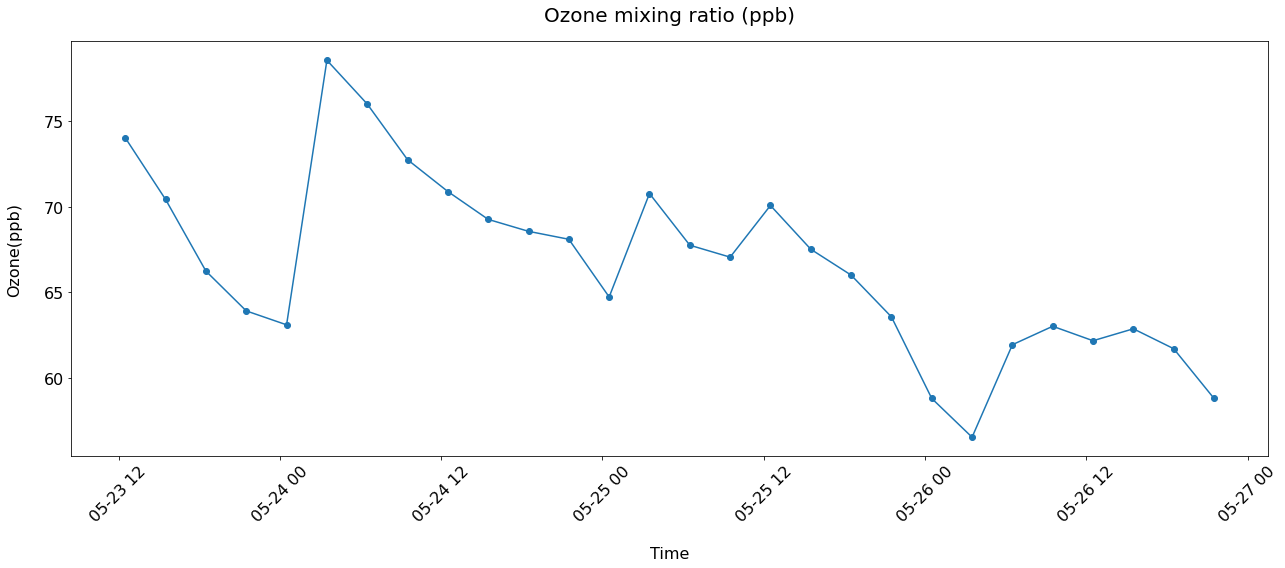

In [16]:
# Plotting the data
fig = plt.figure(figsize=(18,8))
plt.plot(o3_df.index,o3_df.O3, marker='o')

# Customizing the plot
plt.title('Ozone mixing ratio (ppb)', fontsize=20, pad=20)
plt.ylabel('Ozone(ppb)\n', fontsize=16)
plt.xlabel('\nTime', fontsize=16)
plt.xticks(rotation=45)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Displaying the plot
plt.tight_layout()
plt.show()

<hr>

<img src='../img/acam_banner.png' alt='Logo EU Copernicus' align='left' width='30%'><br><br><br><br><br>
This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>